# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [4]:
print(data.shape)
print(data.columns.values)
print(data.project_is_approved.value_counts())
#print(data.head())

Y = data['project_is_approved'].values
X = data.drop('project_is_approved', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, stratify = Y)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size = 0.33, stratify = Y_train)
print(X_train.shape, Y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)

(109248, 9)
['school_state' 'teacher_prefix' 'project_grade_category'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'clean_categories' 'clean_subcategories' 'essay' 'price']
1    92706
0    16542
Name: project_is_approved, dtype: int64
(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)


In [5]:
data.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [6]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## Set - 1 BOW ##
## Essay ##

In [7]:
print(X_train.shape, Y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,3), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, Y_train.shape)
print(X_cv_essay_bow.shape, Y_cv.shape)
print(X_test_essay_bow.shape, Y_test.shape)
print("="*100)

ES = vectorizer.get_feature_names()

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

## School_State ##

In [8]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
print(X_train.shape, Y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)

print("="*100)
    
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, Y_train.shape)
print(X_cv_state_ohe.shape, Y_cv.shape)
print(X_test_state_ohe.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

SS = vectorizer.get_feature_names() 

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


## Teacher_prefix ##

In [9]:
print(X_train.shape, Y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)

print("="*100)

vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, Y_train.shape)
print(X_cv_teacher_ohe.shape, Y_cv.shape)
print(X_test_teacher_ohe.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

TP = vectorizer.get_feature_names()

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


## Project_Grade_Category ##

In [10]:
print(X_train.shape, Y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)

print("="*100)

vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, Y_train.shape)
print(X_cv_grade_ohe.shape, Y_cv.shape)
print(X_test_grade_ohe.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

PGC = vectorizer.get_feature_names()

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


## Clean_Categories ##

In [11]:
print(X_train.shape, Y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)

print("="*100)

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cat = vectorizer.transform(X_train['clean_categories'].values)
X_cv_cat = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cat = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cat.shape, Y_train.shape)
print(X_cv_cat.shape, Y_cv.shape)
print(X_test_cat.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

CC = vectorizer.get_feature_names()

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


## Clean_SubCategories ##

In [12]:
print(X_train.shape, Y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)

print("="*100)

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sub_cat = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_sub_cat = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_sub_cat = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_sub_cat.shape, Y_train.shape)
print(X_cv_sub_cat.shape, Y_cv.shape)
print(X_test_sub_cat.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

CSC = vectorizer.get_feature_names()

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


## Price ##

In [13]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_cv_price_norm = X_cv_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, Y_train.shape)
print(X_cv_price_norm.shape, Y_cv.shape)
print(X_test_price_norm.shape, Y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [14]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_cat, X_train_sub_cat, X_train_price_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_cat, X_cv_sub_cat, X_cv_price_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_cat, X_test_sub_cat, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)
print("="*100)

Final Data matrix
(49041, 5100) (49041,)
(24155, 5100) (24155,)
(36052, 5100) (36052,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [15]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

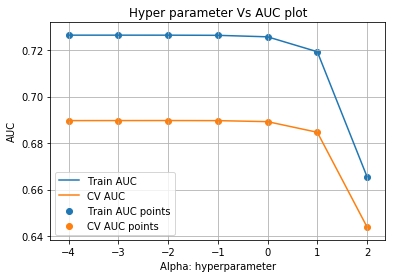

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.223759,0.026267,0.010372,0.002795,0.0001,{'alpha': 0.0001},0.687551,0.679423,0.703148,0.694615,...,0.725357,0.725852,0.726210,0.727871,0.728346,0.726883,0.724921,0.726607,0.726453,0.000998
1,0.230515,0.025912,0.012237,0.002014,0.001,{'alpha': 0.001},0.687549,0.679422,0.703146,0.694616,...,0.725356,0.725851,0.726209,0.727871,0.728345,0.726882,0.724917,0.726607,0.726452,0.000998
2,0.235384,0.028175,0.010989,0.002366,0.01,{'alpha': 0.01},0.687548,0.679426,0.703141,0.694612,...,0.725350,0.725845,0.726202,0.727865,0.728339,0.726876,0.724906,0.726600,0.726445,0.000999
3,0.258365,0.031024,0.014389,0.006416,0.1,{'alpha': 0.1},0.687467,0.679390,0.703092,0.694564,...,0.725288,0.725780,0.726138,0.727801,0.728272,0.726812,0.724837,0.726535,0.726381,0.001000
4,0.241377,0.033209,0.011037,0.001934,1,{'alpha': 1},0.686856,0.678936,0.702714,0.694190,...,0.724667,0.725116,0.725493,0.727168,0.727616,0.726174,0.724188,0.725891,0.725737,0.000999
5,0.251230,0.029544,0.010443,0.001228,10,{'alpha': 10},0.680866,0.674276,0.698330,0.690389,...,0.718398,0.718479,0.719000,0.720903,0.721077,0.719826,0.717840,0.719451,0.719322,0.000999
6,0.241161,0.018578,0.011946,0.002702,100,{'alpha': 100},0.638557,0.633522,0.652345,0.658951,...,0.664567,0.663317,0.664599,0.668253,0.666471,0.666568,0.664068,0.665818,0.665532,0.001359


In [16]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from math import log
prior = [0.5, 0.5]
NB = MultinomialNB(class_prior = prior)
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(NB, parameters, cv=10, scoring='roc_auc', n_jobs = -1)
clf.fit(X_tr, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']
K =  [log(u,10) for u in K]

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head(7)


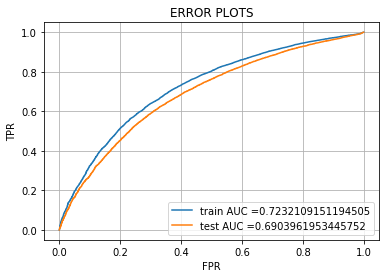

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_alpha = 0.1
NB = MultinomialNB(alpha = best_alpha, class_prior = prior)
NB.fit(X_tr, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = NB.predict_proba(X_tr)[:,1]
y_test_pred = NB.predict_proba(X_te)[:,1]


#y_train_pred = batch_predict(neigh, X_tr)    
#y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [18]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [19]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4479143019649779 for threshold 0.601
Train confusion matrix
[[ 5212  2214]
 [15057 26558]]
Test confusion matrix
[[ 3621  1838]
 [11385 19208]]


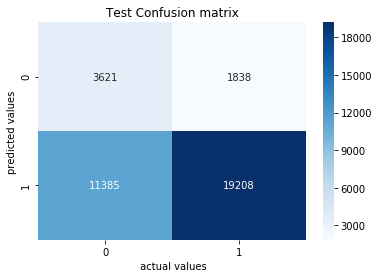

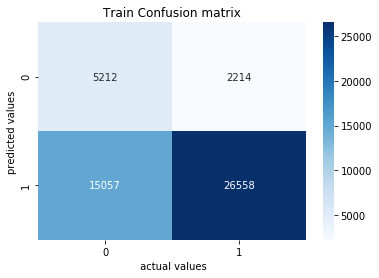

In [20]:
test_con=confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t)) 
sns.heatmap(test_con,annot=True,cmap='Blues', fmt="d") 
plt.xlabel(" actual values") 
plt.ylabel("predicted values") 
plt.title("Test Confusion matrix") 
plt.show()


train_con=confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t)) 
sns.heatmap(train_con,annot=True,cmap='Blues', fmt="d") 
plt.xlabel(" actual values") 
plt.ylabel("predicted values") 
plt.title("Train Confusion matrix") 
plt.show()


## 2. Top 20 features using BOW ##

In [21]:
s = [ES, SS, TP, PGC, CC, CSC, 'Price']
z = np.append(ES, SS)
for t in s[2:]:
    z = np.append(z,t)

In [22]:
print(NB.classes_)
print(NB.feature_log_prob_.shape)

Class_0 = list(NB.feature_log_prob_[0])
Class_1 = list(NB.feature_log_prob_[1])

#Sorting probability values of Respective Classes
Not_accepted = sorted(Class_0, reverse = True)
Accepted = sorted(Class_1, reverse = True)
#First 20 Values
Not_accepted = Not_accepted[0:20]
Accepted = Accepted[0:20]
ind = 0
print("Top 20 features of Class_0")
print('\n')
for i in Not_accepted:
    ind = Class_0.index(i)
    print("Feature : ", z[ind])

print('-'*100)
print("Top 20 features of Class_1")
print('\n')
ind = 0
for i in Accepted:
    ind = Class_1.index(i) 
    print("Feature : ", z[ind])

[0 1]
(2, 5100)
Top 20 features of Class_0


Feature :  students
Feature :  school
Feature :  learning
Feature :  my
Feature :  classroom
Feature :  learn
Feature :  not
Feature :  they
Feature :  help
Feature :  the
Feature :  my students
Feature :  nannan
Feature :  many
Feature :  we
Feature :  need
Feature :  work
Feature :  come
Feature :  love
Feature :  reading
Feature :  able
----------------------------------------------------------------------------------------------------
Top 20 features of Class_1


Feature :  students
Feature :  school
Feature :  my
Feature :  learning
Feature :  classroom
Feature :  the
Feature :  they
Feature :  not
Feature :  my students
Feature :  learn
Feature :  help
Feature :  many
Feature :  nannan
Feature :  we
Feature :  work
Feature :  need
Feature :  reading
Feature :  use
Feature :  love
Feature :  day


## Set - 2 TF-IDF ##

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,3), max_features=5000 )

print(X_train.shape, Y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)

print("="*100)


vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, Y_train.shape)
print(X_cv_essay_tfidf.shape, Y_cv.shape)
print(X_test_essay_tfidf.shape, Y_test.shape)
print("="*100)
#print(vectorizer.get_feature_names())



(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [24]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_cat, X_train_sub_cat, X_train_price_norm)).tocsr()
X_cr = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_cat, X_cv_sub_cat, X_cv_price_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_cat, X_test_sub_cat, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)
print("="*100)

Final Data matrix
(49041, 5100) (49041,)
(24155, 5100) (24155,)
(36052, 5100) (36052,)


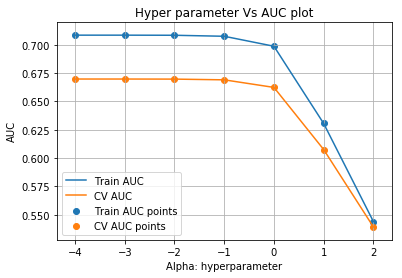

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.242257,0.032600,0.011969,0.005628,0.0001,{'alpha': 0.0001},0.668117,0.658722,0.676286,0.665202,...,0.708276,0.706965,0.709667,0.710103,0.709168,0.707879,0.707404,0.709581,0.708551,0.000983
1,0.229287,0.014057,0.010271,0.002045,0.001,{'alpha': 0.001},0.668104,0.658716,0.676277,0.665201,...,0.708268,0.706956,0.709658,0.710094,0.709160,0.707870,0.707395,0.709571,0.708542,0.000983
2,0.232377,0.027806,0.010871,0.002462,0.01,{'alpha': 0.01},0.668008,0.658663,0.676213,0.665153,...,0.708180,0.706865,0.709570,0.710003,0.709066,0.707782,0.707309,0.709483,0.708452,0.000982
3,0.260106,0.021678,0.015454,0.009348,0.1,{'alpha': 0.1},0.667102,0.658042,0.675520,0.664537,...,0.707303,0.705965,0.708683,0.709101,0.708149,0.706901,0.706413,0.708592,0.707562,0.000979
4,0.225235,0.012421,0.011424,0.001821,1,{'alpha': 1},0.658672,0.651718,0.668400,0.658290,...,0.698601,0.697126,0.699837,0.700249,0.699188,0.698220,0.697454,0.699719,0.698755,0.000963
5,0.212767,0.014764,0.011076,0.001636,10,{'alpha': 10},0.594575,0.600191,0.610189,0.608390,...,0.630309,0.629699,0.630401,0.631823,0.630676,0.632321,0.627360,0.630216,0.630558,0.001324
6,0.226955,0.021225,0.011821,0.001095,100,{'alpha': 100},0.527157,0.539562,0.534474,0.548962,...,0.544596,0.543151,0.543781,0.544150,0.543489,0.546876,0.541964,0.542162,0.543975,0.001388


In [25]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from math import log
prior = [0.5, 0.5]
NB = MultinomialNB(class_prior = prior)
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(NB, parameters, cv=10, scoring='roc_auc', n_jobs = -1)
clf.fit(X_tr, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']
K =  [log(u,10) for u in K]

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head(7)


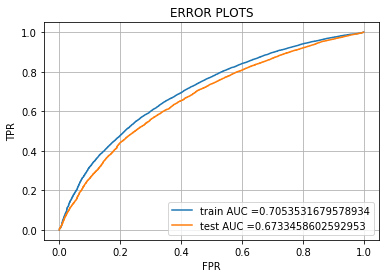

In [26]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_alpha = 0.001
NB = MultinomialNB(alpha = best_alpha, class_prior = prior)
NB.fit(X_tr, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = NB.predict_proba(X_tr)[:,1]
y_test_pred = NB.predict_proba(X_te)[:,1]


#y_train_pred = batch_predict(neigh, X_tr)    
#y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [27]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [28]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4246410067740664 for threshold 0.497
Train confusion matrix
[[ 4880  2546]
 [14724 26891]]
Test confusion matrix
[[ 3366  2093]
 [11031 19562]]


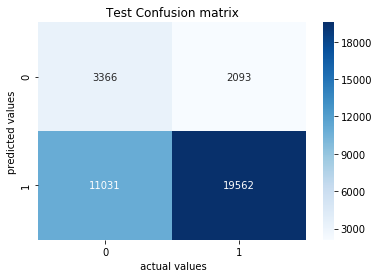

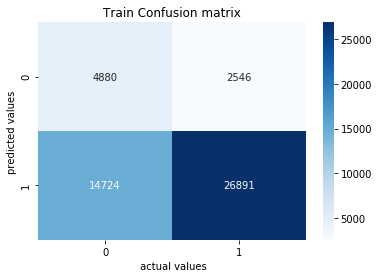

In [29]:
test_con=confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t)) 
sns.heatmap(test_con,annot=True,cmap='Blues', fmt="d") 
plt.xlabel(" actual values") 
plt.ylabel("predicted values") 
plt.title("Test Confusion matrix") 
plt.show()


train_con=confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t)) 
sns.heatmap(train_con,annot=True,cmap='Blues', fmt="d") 
plt.xlabel(" actual values") 
plt.ylabel("predicted values") 
plt.title("Train Confusion matrix") 
plt.show()

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

| Vectorizer | Model  | hyperparameter alpha | test AUC |
|------------|--------|----------------------|----------|
|      BOW   |    NB  |           0.01         |   0.6904 |
|    TFIDF   |    NB  |           0.001        |   0.6733 |